In [285]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Nettoyage : suppression de doublons, gestion des valeurs manquantes

In [237]:
cars_data = pd.read_csv('car_details.csv')

In [238]:
cars_data = cars_data.drop(columns=['Première main'])
cars_data = cars_data.drop(columns=['Origine'])

In [239]:
cars_data = cars_data.dropna(subset=['Prix'])
cars_data = cars_data.dropna(subset=['État'])
cars_data = cars_data.dropna(subset=['Nombre de portes'])

In [240]:
cars_data['Prix'] = cars_data['Prix'].astype(str).str.replace(r'[^\d]', '', regex=True)
cars_data['Prix'] = pd.to_numeric(cars_data['Prix'], errors='coerce')

In [241]:
cars_data['Puissance fiscale'] = cars_data['Puissance fiscale'].str.replace('CV','',regex=False)
cars_data['Puissance fiscale'] = pd.to_numeric(cars_data['Puissance fiscale'],errors='coerce')

In [242]:
def calculate_average_km(kms):
    parts = kms.split('-')
    nums = [float(p.strip().replace(' ', '')) for p in parts]
    return sum(nums) / len(nums)
cars_data['average_km'] = cars_data['Kilométrage'].apply(calculate_average_km)
cars_data = cars_data.drop(columns=['Kilométrage'])

In [243]:
cars_data.head()

,Marque,Modèle,Année,Type de carburant,Puissance fiscale,Nombre de portes,État,Boîte à vitesses,Prix,average_km
0,Hyundai,Tucson,2023,Diesel,6,5.0,Excellent,Automatique,335000,52499.5
2,Fiat,500,2015,Essence,7,3.0,Bon,Manuelle,85000,92499.5
4,Renault,Clio,2008,Essence,6,5.0,Très bon,Manuelle,50000,2499.5
13,Dacia,Logan,2022,Diesel,6,5.0,Excellent,Manuelle,129000,104999.5
14,Land Rover,Range Rover Evoque,2016,Diesel,8,5.0,Excellent,Automatique,210000,134999.5


In [245]:
cars_data.isnull().sum().sum()

0

## Encodage des variables catégoriques

In [257]:
cars_data.select_dtypes(include=['object']).columns

Index(['Marque', 'Modèle', 'Type de carburant', 'État', 'Boîte à vitesses'], dtype='object')

In [260]:
label_Encoder = LabelEncoder()
cars_data['Marque'] = label_Encoder.fit_transform(cars_data['Marque'])
cars_data['Modèle'] = label_Encoder.fit_transform(cars_data['Modèle'])
cars_data['Type de carburant'] = label_Encoder.fit_transform(cars_data['Type de carburant'])
cars_data['État'] = label_Encoder.fit_transform(cars_data['État'])
cars_data['Boîte à vitesses'] = label_Encoder.fit_transform(cars_data['Boîte à vitesses'])

In [261]:
cars_data.head()

,Marque,Modèle,Année,Type de carburant,Puissance fiscale,Nombre de portes,État,Boîte à vitesses,Prix,average_km
0,4,16,2023,0,6,5.0,1,0,335000,52499.5
2,2,0,2015,1,7,3.0,0,1,85000,92499.5
4,8,2,2008,1,6,5.0,2,1,50000,2499.5
13,1,8,2022,0,6,5.0,1,1,129000,104999.5
14,5,14,2016,0,8,5.0,1,0,210000,134999.5


## Normalisation / standardisation des variables numériques

In [270]:
num_cols = ['Année', 'Puissance fiscale', 'Nombre de portes', 'Prix', 'average_km']
num_cols

['Année', 'Puissance fiscale', 'Nombre de portes', 'Prix', 'average_km']

In [268]:
scaler = StandardScaler()
cars_data[num_cols] = scaler.fit_transform(cars_data[num_cols])

In [269]:
cars_data.head()

,Marque,Modèle,Année,Type de carburant,Puissance fiscale,Nombre de portes,État,Boîte à vitesses,Prix,average_km
0,4,16,1.359895,0,-1.009233,0.317105,1,0,0.266928,-1.629312
2,2,0,-0.520372,1,-0.583217,-3.153530,0,1,-0.875914,-0.709290
4,8,2,-2.165605,1,-1.009233,0.317105,2,1,-1.035911,-2.779340
13,1,8,1.124862,0,-1.009233,0.317105,1,1,-0.674774,-0.421783
14,5,14,-0.285338,0,-0.157202,0.317105,1,0,-0.304493,0.268233


## Analyse Exploratoire des Données (EDA)

#### Distribution des prix

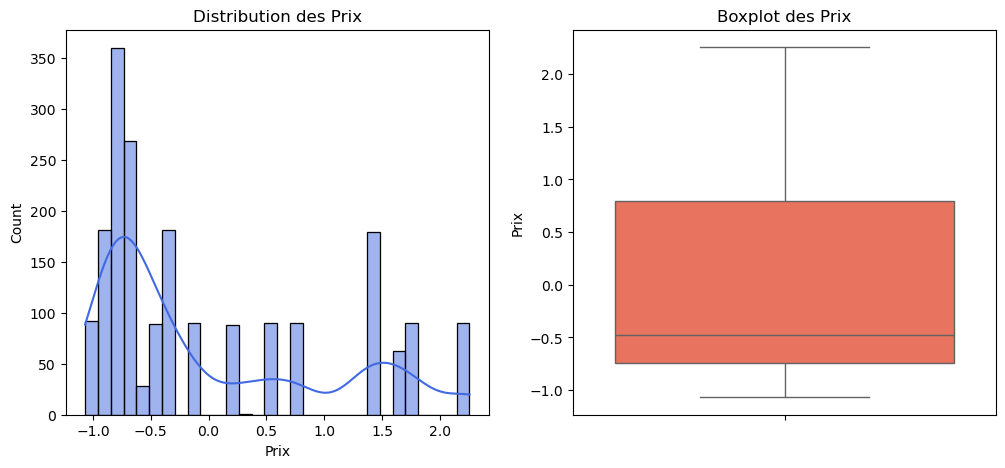

In [290]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(cars_data['Prix'], kde=True, bins=30, color='royalblue')
plt.title('Distribution des Prix')

plt.subplot(1, 2, 2)
sns.boxplot(y=cars_data['Prix'], color='tomato')
plt.title('Boxplot des Prix')
plt.show()

#### Visualisations : Histogrammes, boxplots, scatter plots, Heatmaps de corrélation

Text(0.5, 1.0, 'Corrélations entre Variables Numériques')

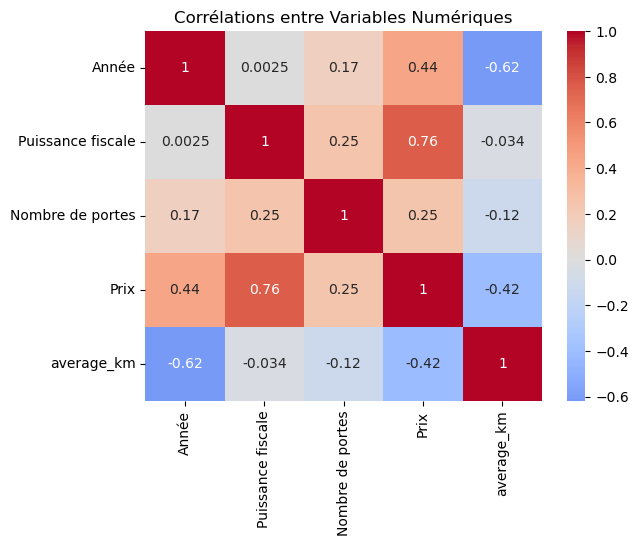

In [276]:
corr = cars_data[['Année', 'Puissance fiscale', 'Nombre de portes', 'Prix', 'average_km']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Corrélations entre Variables Numériques')

Text(0.5, 1.02, 'Relations Multivariées')

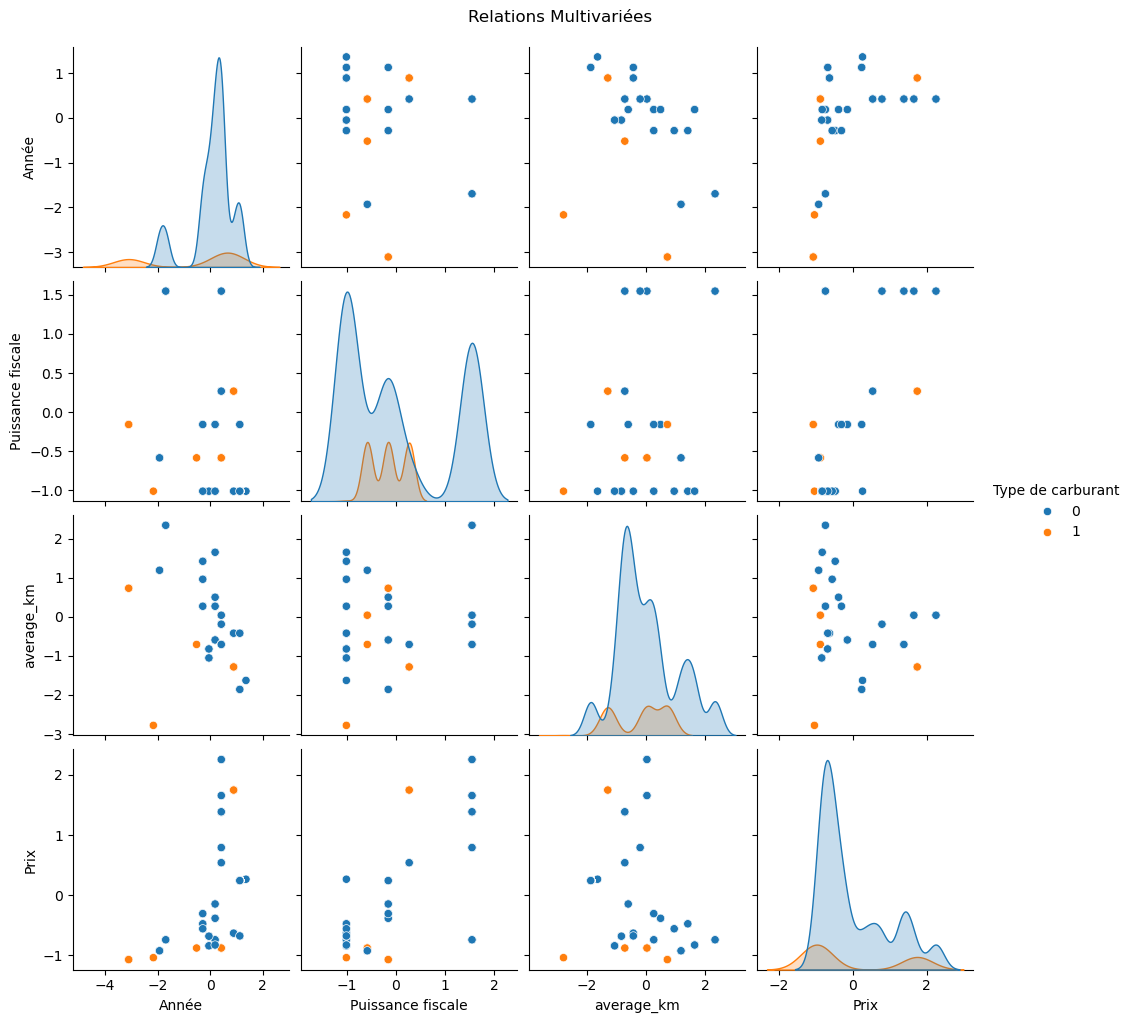

In [277]:
sns.pairplot(cars_data, vars=['Année', 'Puissance fiscale', 'average_km', 'Prix'], hue='Type de carburant')
plt.suptitle('Relations Multivariées', y=1.02)

#### Détection de valeurs aberrantes

In [287]:
z_scores = np.abs(stats.zscore(cars_data[num_cols]))
outliers = cars_data[(z_scores > 3).any(axis=1)]
print(f"Nombre d'outliers détectés : {len(outliers)}")

Nombre d'outliers détectés : 272


#### Analyse préliminaire des relations entre caractéristiques et prix

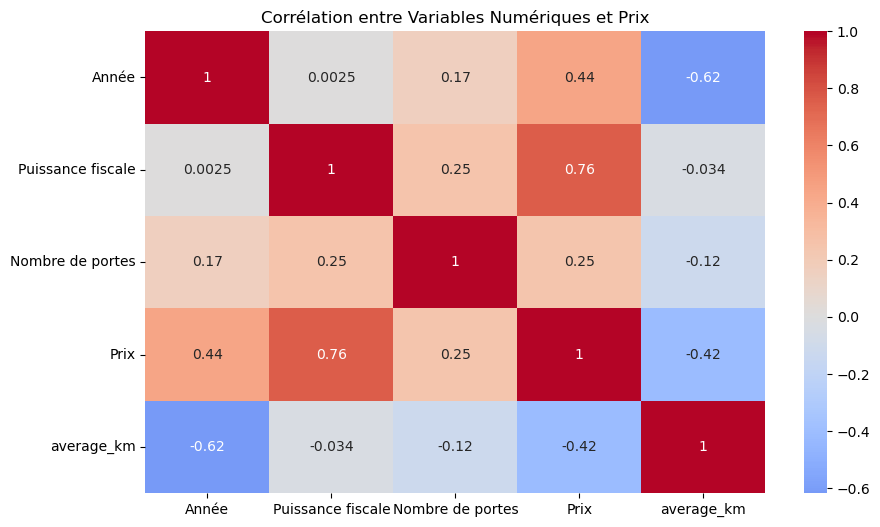

In [294]:
corr_matrix = cars_data[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Corrélation entre Variables Numériques et Prix')
plt.show()

C:\Users\ANarj\AppData\Local\Temp\ipykernel_14072\2135792992.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Prix', data=cars_data, palette='viridis')


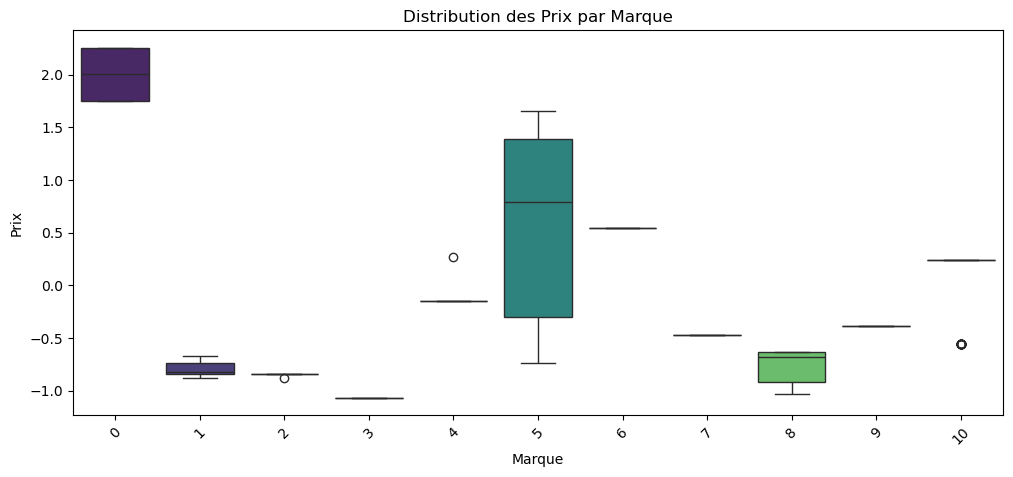

C:\Users\ANarj\AppData\Local\Temp\ipykernel_14072\2135792992.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Prix', data=cars_data, palette='viridis')


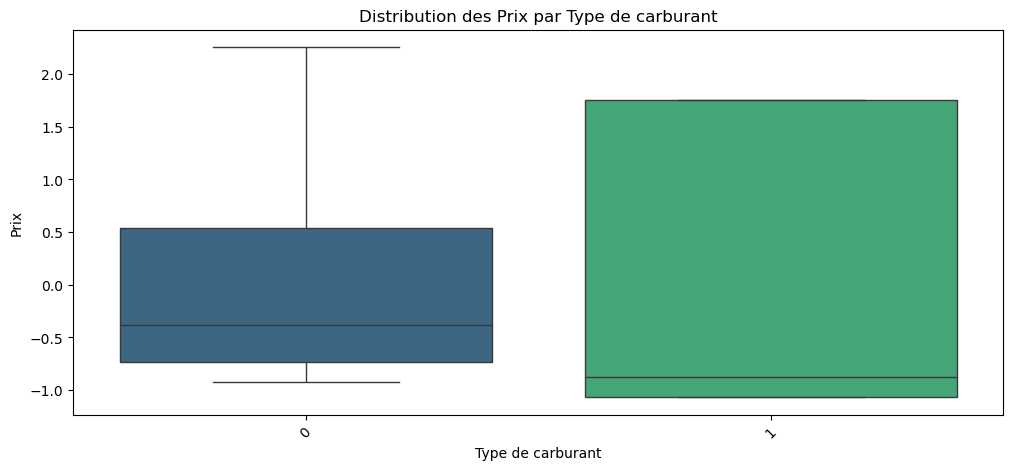

C:\Users\ANarj\AppData\Local\Temp\ipykernel_14072\2135792992.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Prix', data=cars_data, palette='viridis')


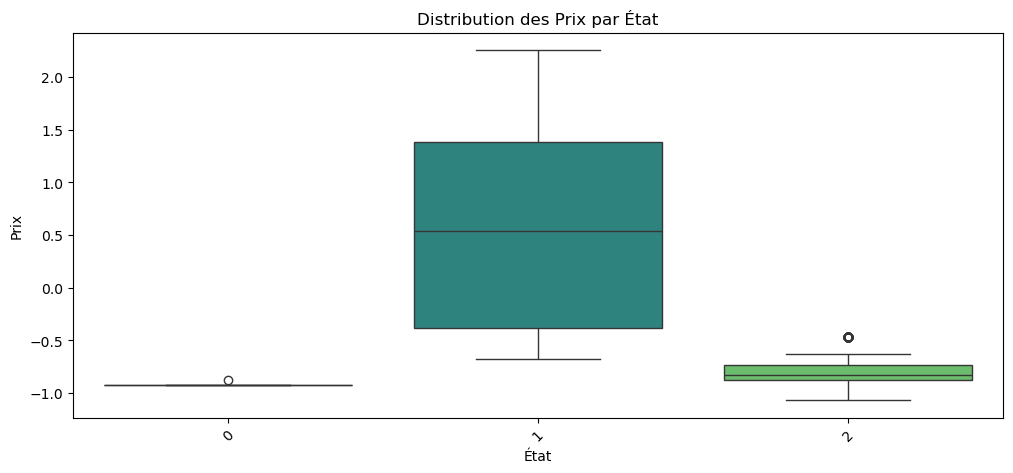

C:\Users\ANarj\AppData\Local\Temp\ipykernel_14072\2135792992.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Prix', data=cars_data, palette='viridis')


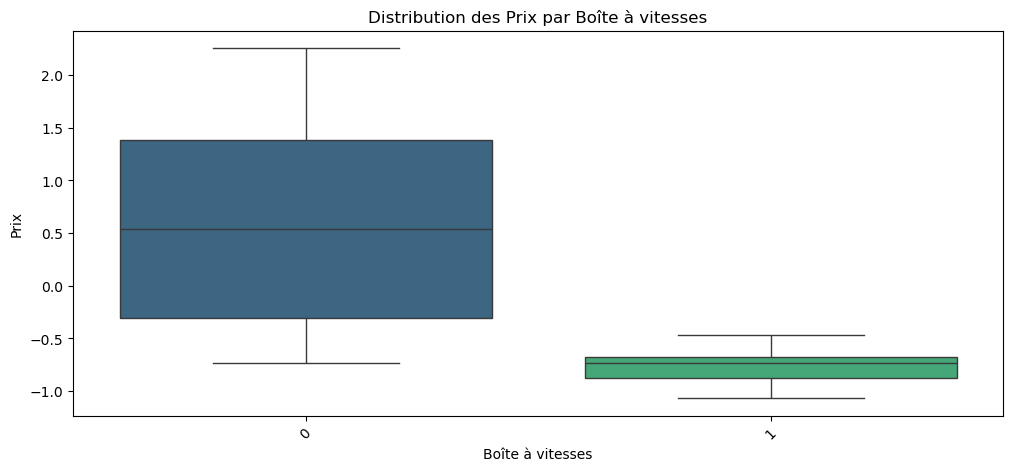

In [293]:
cat_cols = ['Marque', 'Type de carburant', 'État', 'Boîte à vitesses']

for col in cat_cols:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=col, y='Prix', data=cars_data, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'Distribution des Prix par {col}')
    plt.show()